In [2]:
import os
import threedidepth
from netCDF4 import Dataset
from datetime import datetime, timedelta

# 输入路径
gridadmin_path = "../data/3di_res/gridadmin.h5"
results_path = "../data/3di_res/221140.nc"
dem_path = "../data/3di_res/20m_dem.tif"

# 从 NetCDF 文件中读取时间戳
with Dataset(results_path, mode="r") as nc:
    # 假设时间存储在变量 "time" 中，单位为 seconds since 1970-01-01
    time_var = nc.variables["time"]  # 替换为 NetCDF 文件中实际的时间变量名称
    time_units = time_var.units      # 获取时间单位，例如 "seconds since 1970-01-01"
    time_values = time_var[:]        # 提取时间值数组
    # 解析时间单位
    base_time = datetime.strptime(time_units.split("since")[1].strip(), "%Y-%m-%d %H:%M:%S")
    timestamps = [base_time + timedelta(seconds=float(t)) for t in time_values]  # 计算绝对时间戳

# 总的计算步数
calculation_steps_count = len(timestamps)

# 循环生成文件
for i in range(calculation_steps_count):
    # 当前时间戳
    current_time = timestamps[i]
    time_str = current_time.strftime("%Y%m%d_%H%M%S")  # 格式化为 YYYYMMDD_HHMMSS

    # 输出文件路径
    output_path = f"../data/3di_res/waterdepth_folder/waterdepth_{time_str}.tif"

    # 检查文件是否已存在
    if os.path.exists(output_path):
        print(f"File already exists, skipping: {output_path}")
        continue

    # 当前计算步
    calculation_step = [i]

    # 执行水深计算
    
    threedidepth.calculate_waterdepth(
        gridadmin_path=gridadmin_path,
        results_3di_path=results_path,
        dem_path=dem_path,
        waterdepth_path=output_path,
        calculation_steps=calculation_step
    )

    print(f"Calculation step {i} completed: {output_path}")

File already exists, skipping: waterdepth_folder/waterdepth_20240101_000000.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_003002.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_010000.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_013000.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_020002.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_023003.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_030003.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_033001.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_040001.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_043000.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_050002.tif
File already exists, skipping: waterdepth_folder/waterdepth_20240101_053003.tif
File already exists, skipping: waterdept

In [3]:
import rasterio
import numpy as np
import os

# 文件夹路径
folder_path = "../data/3di_res/waterdepth_folder"

# 遍历文件夹中的所有 .tif 文件
for file_name in os.listdir(folder_path):
    # 检查文件是否是 .tif 文件
    if file_name.endswith(".tif"):
        file_path = os.path.join(folder_path, file_name)  # 原始文件路径
        
        # 打开 GeoTIFF 文件
        with rasterio.open(file_path, "r+") as src:  # 使用 "r+" 模式以直接修改文件
            # 读取第一个波段的数据
            data = src.read(1)
            
            # 替换 -9999 为 0
            data[data == -9999] = 0
            
            # 更新文件中的数据
            src.write(data, 1)
            
            # 更新 NoData 值为 0（可选）
            src.nodata = 0  # 如果需要保留原 NoData 值，可以跳过这一行
            
        print(f"处理完成，文件已更新：{file_path}")

处理完成，文件已更新：waterdepth_folder/waterdepth_20240102_203001.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_200000.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240101_230002.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_160002.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_103002.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240101_033001.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_060003.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_193000.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240102_000002.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240102_100000.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_093002.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240102_063000.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240102_163000.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240102_090003.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240103_003001.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_20240101_133002.tif
处理完成，文件已更新：waterdepth_folder/waterdepth_

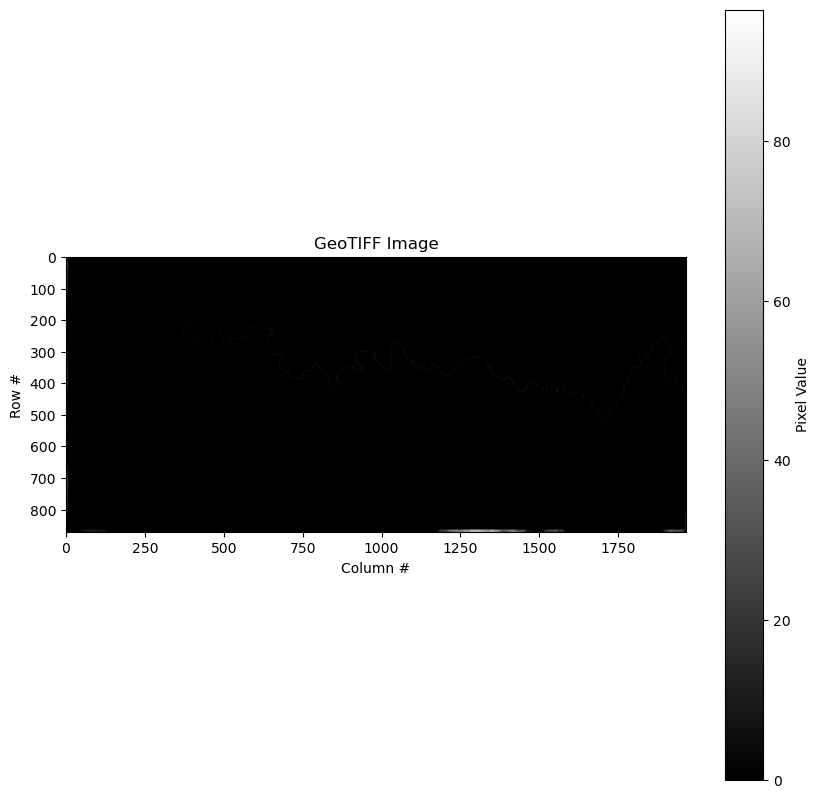

In [5]:
#Display Geotiff

import rasterio
import matplotlib.pyplot as plt

# Path to the GeoTIFF file
geotiff_path = '../data/3di_res/waterdepth_folder/waterdepth_20240101_003002.tif'

# Open the GeoTIFF file
with rasterio.open(geotiff_path) as src:
    # Read the first band
    data = src.read(1)
    # data[data == -9999] = 0

    
    # Display with matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(data, cmap='gray')
    plt.colorbar(label='Pixel Value')
    plt.title('GeoTIFF Image')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()

In [8]:
import subprocess
import os

def generate_tiles(input_file, color_table, output_folder, zoom_levels="0-14", processes=8):
    """
    Generate map tiles for a given raster file with color mapping.

    Parameters:
    - input_file (str): Path to the input raster file (e.g., water depth GeoTIFF).
    - color_table (str): Path to the color table file (e.g., color.txt).
    - output_folder (str): Path to the output folder for tiles.
    - zoom_levels (str): Zoom levels for gdal2tiles.py (default: "0-14").
    - processes (int): Number of processes for gdal2tiles.py (default: 8).

    Outputs:
    - Tiles will be saved in the specified output folder.
    """
    try:
        # Create temporary and intermediate file paths
        temp_file = os.path.join(output_folder, "temp.vrt")
        color_mapped_file = os.path.join(output_folder, "color_mapped.tif")
        transparent_file = os.path.join(output_folder, "transparent.tif")
        
        # Step 1: Convert to 8-bit using gdal_translate
        convert_command = [
            "gdal_translate",
            "-of", "VRT",       # Output format: VRT
            "-ot", "Byte",      # Convert to 8-bit
            "-scale",           # Auto-scale pixel values
            input_file,
            temp_file
        ]
        print(f"Running: {' '.join(convert_command)}")
        subprocess.run(convert_command, check=True)

        # Step 2: Apply color mapping using gdaldem
        color_command = [
            "gdaldem", "color-relief",
            temp_file,
            color_table,
            color_mapped_file
        ]
        print(f"Running: {' '.join(color_command)}")
        subprocess.run(color_command, check=True)

        # Step 3: Add transparency for 0 values
        transparency_command = [
            "gdalwarp",
            "-dstalpha",           # Add Alpha (transparency) channel
            "-srcnodata", "0",     # Source nodata value
            "-dstnodata", "0",     # Set transparent for nodata values
            color_mapped_file,
            transparent_file
        ]
        print(f"Running: {' '.join(transparency_command)}")
        subprocess.run(transparency_command, check=True)

        # Step 4: Generate tiles using gdal2tiles.py
        tile_command = [
            "gdal2tiles.py",
            "-z", zoom_levels,              # Set zoom levels
            "-p", "mercator",               # Use Web Mercator projection
            transparent_file,
            output_folder,
            "--xyz",
            "--processes", str(processes)   # Set number of processes
        ]
        print(f"Running: {' '.join(tile_command)}")
        subprocess.run(tile_command, check=True)

        print(f"Tiles generated successfully in {output_folder}")
    except subprocess.CalledProcessError as e:
        print(f"Command failed: {e.cmd}\nError: {e.stderr}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
# generate_tiles("input.tif", "color.txt", "output_tiles")

In [9]:

# 指定输入文件夹和输出根目录
input_folder = "../data/3di_res/waterdepth_folder"
color_table = "color.txt"
output_root_folder = "../data/3di_res/timeseries_tiles"

# 遍历文件夹中的所有 .tif 文件
for file_name in os.listdir(input_folder):
    if file_name.endswith(".tif"):
        # 完整输入文件路径
        input_file = os.path.join(input_folder, file_name)
        
        # 从文件名提取时间点（假设文件名中包含时间信息，例如 data_20230101.tif）
        time_point = os.path.splitext(file_name)[0]  # 移除扩展名
        output_folder = os.path.join(output_root_folder, time_point)  # 按时间点创建输出目录
        
        # 创建输出目录（如果不存在）
        os.makedirs(output_folder, exist_ok=True)
        
        # 调用 generate_tiles 函数
        print(f"Processing file: {input_file}")
        generate_tiles(input_file, color_table, output_folder)

Processing file: waterdepth_folder/waterdepth_20240102_203001.tif
Running: gdal_translate -of VRT -ot Byte -scale waterdepth_folder/waterdepth_20240102_203001.tif timeseries_tiles/waterdepth_20240102_203001/temp.vrt
Input file size is 1965, 872
Running: gdaldem color-relief timeseries_tiles/waterdepth_20240102_203001/temp.vrt color.txt timeseries_tiles/waterdepth_20240102_203001/color_mapped.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
Running: gdalwarp -dstalpha -srcnodata 0 -dstnodata 0 timeseries_tiles/waterdepth_20240102_203001/color_mapped.tif timeseries_tiles/waterdepth_20240102_203001/transparent.tif
Processing timeseries_tiles/waterdepth_20240102_203001/color_mapped.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Running: gdal2tiles.py -z 0-14 -p mercator timeseries_tiles/waterdepth_20240102_203001/transparent.tif timeseries_tiles/waterdepth_20240102_203001 --xyz --processes 8
Generating Base Tiles:
0...10...20...30...40...50...60...